**Date:** 2026-01-19
**Block:** Phase 1 / Week 1
**Topic:** Data Flow and mini pipelines

**What I'm learning today:**

Understand how data moves through a sequence of Python steps, and how small, linear pipelines are built, broken, and fixed.

Not “advanced pipelines” — simple, visible, traceable flows.

**Goal for this session:**

Prove how data moves through a sequence of Python steps, and how small, linear pipelines are built, broken, and fixed.


**Success criteria:**
✔ I can explain how data flows line-by-line through a mini pipeline
✔️ I can predict where a pipeline will break before running it
✔️ I can explain why reordering steps fixes the pipeline
✔️ I recorded at least one reusable data-flow rule

Experiment 1 -Expressions produces values

In [1]:
# PREDICTION (write BEFORE running):
# 1) 2 + 3 -> ?
# 2) "hello".upper() -> ?
# 3) len([1,2,3,4]) -> ?
# 4) 3 > 10 -> ?
# 5) (10 // 3) + (10 % 3) -> ?


from matplotlib.pyplot import show

show("2 + 3", 2 + 3)
show('"hello".upper()', "hello".upper())
show("len([1,2,3,4])", len([1, 2, 3, 4]))
show("3 > 10", 3 > 10)
show("(10 // 3) + (10 % 3)", (10 // 3) + (10 % 3))


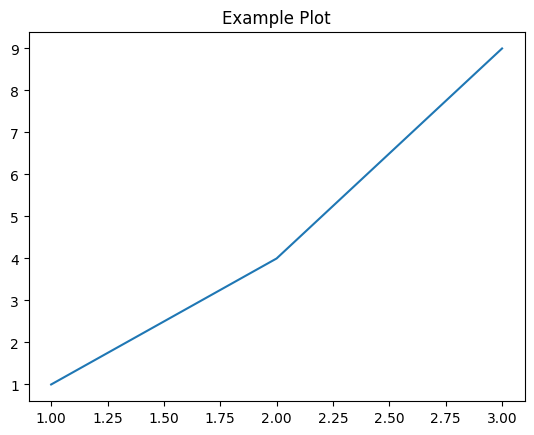

In [4]:
# The code in CELL INDEX: 2 makes incorrect assumptions about:
# - Data types: It assumes matplotlib.pyplot.show() can accept string labels and various value types (int, str, bool) as arguments to display them like a print function, but show() is designed for displaying matplotlib figures and does not handle arbitrary data types in this way.
# - Data structure size: It assumes show() can take exactly two arguments (a string and a value), but the underlying backend's show method (e.g., in TkAgg) expects a different number of arguments, leading to a TypeError for too many positional arguments.
# - Execution order: It assumes that calling show() with expressions will evaluate and display the results in sequence without errors, but the misuse causes an immediate TypeError on the first call, halting execution before any "display" occurs.

# How could this error have been prevented? The error could have been prevented by using the correct function for displaying output, such as the built-in print() function, instead of matplotlib.pyplot.show(). For example, replacing show("2 + 3", 2 + 3) with print("2 + 3:", 2 + 3) would correctly display the results without causing a TypeError.

# show an example of the use of show() that would not cause this error.

import matplotlib.pyplot as plt

# Create a simple plot
plt.plot([1, 2, 3], [1, 4, 9])
plt.title("Example Plot")

# Show the plot
plt.show()



In [3]:
print("2 + 3", 2 + 3)
print('"hello".upper()', "hello".upper())
print("len([1,2,3,4])", len([1, 2, 3, 4]))
print("3 > 10", 3 > 10)
print("(10 // 3) + (10 % 3)", (10 // 3) + (10 % 3))

2 + 3 5
"hello".upper() HELLO
len([1,2,3,4]) 4
3 > 10 False
(10 // 3) + (10 % 3) 4


Experiment 2 — Triggering Tracebacks (pipeline breaks)

In [5]:
# PREDICTION (write BEFORE running):
# What prints? What variables exist after?

x = 5
print("hi")
y = x + 2

if y > 5:
    print("y is big")

for i in range(2):
    print("loop", i)

print("x =", x)
print("y =", y)


hi
y is big
loop 0
loop 1
x = 5
y = 7


Experiment 3 — Operations depend on TYPES

In [6]:
# PREDICTION:
# Which lines succeed? Which fail? Why?

print("'a' + 'b'", 'a' + 'b')
print("3 + 4", 3 + 4)
print("[1,2] + [3]", [1, 2] + [3])

print("'ha' * 3", "ha" * 3)
print("[9] * 4", [9] * 4)
print("10 / 4", 10 / 4)
print("10 // 4", 10 // 4)
print("10 % 4", 10 % 4)

'a' + 'b' ab
3 + 4 7
[1,2] + [3] [1, 2, 3]
'ha' * 3 hahaha
[9] * 4 [9, 9, 9, 9]
10 / 4 2.5
10 // 4 2
10 % 4 2


EXPERIMENT 4 — Operator precedence (what runs first)

In [7]:
# PREDICTION:
# 1) 5 + 3 * 2 = ?
# 2) (5 + 3) * 2 = ?
# 3) 10 - 4 / 2 = ?
# 4) (10 - 4) / 2 = ?

print("5 + 3 * 2", 5 + 3 * 2)
print("(5 + 3) * 2", (5 + 3) * 2)
print("10 - 4 / 2", 10 - 4 / 2)
print("(10 - 4) / 2", (10 - 4) / 2)

5 + 3 * 2 11
(5 + 3) * 2 16
10 - 4 / 2 8.0
(10 - 4) / 2 3.0


EXPERIMENT 5 — Comparisons produce True/False (and can surprise you)

In [ ]:
# PREDICTION: True or False for each?

print("3 == 3", 3 == 3)
print("3 == '3'", 3 == "3")
print("3 < 10", 3 < 10)
print("'a' < 'b'", "a" < "b")
print("5 <= 5", 5 <= 5)
print("5 != 5", 5 != 5)


3 == 3 True
3 == '3' False
3 < 10 True
'a' < 'b' True
5 <= 5 True
5 != 5 False


In [9]:
# Chained comparisons (predict)
# PREDICTION:
# What does this evaluate to, and why?

print("1 < 2 < 3", 1 < 2 < 3)
print("1 < 2 > 3", 1 < 2 > 3)
print("5 == 5 == 5", 5 == 5 == 5)

1 < 2 < 3 True
1 < 2 > 3 False
5 == 5 == 5 True


EXPERIMENT 6 — Learning traps (intentional errors)